# overfiting

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.2633333333333333
                : 10. 正答率(テスト) = 0.215
Generation: 20. 正答率(トレーニング) = 0.3
                : 20. 正答率(テスト) = 0.2517
Generation: 30. 正答率(トレーニング) = 0.32666666666666666
                : 30. 正答率(テスト) = 0.2638
Generation: 40. 正答率(トレーニング) = 0.35
                : 40. 正答率(テスト) = 0.29
Generation: 50. 正答率(トレーニング) = 0.4033333333333333
                : 50. 正答率(テスト) = 0.3267
Generation: 60. 正答率(トレーニング) = 0.49
                : 60. 正答率(テスト) = 0.3758
Generation: 70. 正答率(トレーニング) = 0.59
                : 70. 正答率(テスト) = 0.4258
Generation: 80. 正答率(トレーニング) = 0.6633333333333333
                : 80. 正答率(テスト) = 0.4706
Generation: 90. 正答率(トレーニング) = 0.7133333333333334
                : 90. 正答率(テスト) = 0.5281
Generation: 100. 正答率(トレーニング) = 0.76
                : 100. 正答率(テスト) = 0.5574
Generation: 110. 正答率(トレーニング) = 0.8133333333333334
                : 110. 正答率(テスト) = 0.6086
Generation: 120. 正答率(トレーニング) = 0.8366666666666667
                : 120. 正答率(テスト

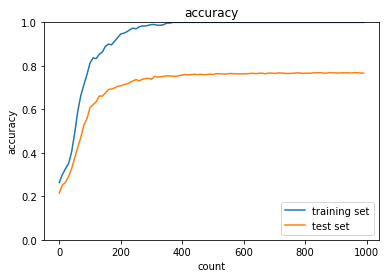

In [1]:
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
from collections import OrderedDict
from common import layers
from data.mnist import load_mnist
import matplotlib.pyplot as plt
from multi_layer_net import MultiLayerNet
from common import optimizer


(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)
optimizer = optimizer.SGD(learning_rate=0.01)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10


for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    optimizer.update(network.params, grad)

    loss = network.loss(x_batch, d_batch)
    train_loss_list.append(loss)
        
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)

        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))        

lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

## weight decay
### L2

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.14666666666666667
                : 10. 正答率(テスト) = 0.133
Generation: 20. 正答率(トレーニング) = 0.20333333333333334
                : 20. 正答率(テスト) = 0.163
Generation: 30. 正答率(トレーニング) = 0.27666666666666667
                : 30. 正答率(テスト) = 0.2113
Generation: 40. 正答率(トレーニング) = 0.3333333333333333
                : 40. 正答率(テスト) = 0.2561
Generation: 50. 正答率(トレーニング) = 0.4
                : 50. 正答率(テスト) = 0.3072
Generation: 60. 正答率(トレーニング) = 0.4766666666666667
                : 60. 正答率(テスト) = 0.3638
Generation: 70. 正答率(トレーニング) = 0.5233333333333333
                : 70. 正答率(テスト) = 0.3889
Generation: 80. 正答率(トレーニング) = 0.5733333333333334
                : 80. 正答率(テスト) = 0.4408
Generation: 90. 正答率(トレーニング) = 0.5766666666666667
                : 90. 正答率(テスト) = 0.4604
Generation: 100. 正答率(トレーニング) = 0.63
                : 100. 正答率(テスト) = 0.4902
Generation: 110. 正答率(トレーニング) = 0.65
                : 110. 正答率(テスト) = 0.5087
Generation: 120. 正答率(トレーニング) = 0.6866666666666666

Generation: 970. 正答率(トレーニング) = 0.9066666666666666
                : 970. 正答率(テスト) = 0.7081
Generation: 980. 正答率(トレーニング) = 0.9033333333333333
                : 980. 正答率(テスト) = 0.7013
Generation: 990. 正答率(トレーニング) = 0.9133333333333333
                : 990. 正答率(テスト) = 0.7017
Generation: 1000. 正答率(トレーニング) = 0.91
                : 1000. 正答率(テスト) = 0.7066


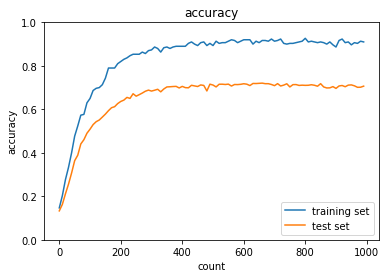

In [2]:
from common import optimizer

(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]


network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)


iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate=0.01

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10
hidden_layer_num = network.hidden_layer_num

# 正則化強度設定 ======================================
weight_decay_lambda = 0.1
# =================================================

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    weight_decay = 0
    
    for idx in range(1, hidden_layer_num+1):
        grad['W' + str(idx)] = network.layers['Affine' + str(idx)].dW + weight_decay_lambda * network.params['W' + str(idx)]
        grad['b' + str(idx)] = network.layers['Affine' + str(idx)].db
        network.params['W' + str(idx)] -= learning_rate * grad['W' + str(idx)]
        network.params['b' + str(idx)] -= learning_rate * grad['b' + str(idx)]        
        weight_decay += 0.5 * weight_decay_lambda * np.sqrt(np.sum(network.params['W' + str(idx)] ** 2))

    loss = network.loss(x_batch, d_batch) + weight_decay
    train_loss_list.append(loss)        
        
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))               


lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

### L1

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.3933333333333333
                : 10. 正答率(テスト) = 0.3234
Generation: 20. 正答率(トレーニング) = 0.6566666666666666
                : 20. 正答率(テスト) = 0.5396
Generation: 30. 正答率(トレーニング) = 0.5966666666666667
                : 30. 正答率(テスト) = 0.4764
Generation: 40. 正答率(トレーニング) = 0.43666666666666665
                : 40. 正答率(テスト) = 0.3626
Generation: 50. 正答率(トレーニング) = 0.6433333333333333
                : 50. 正答率(テスト) = 0.5234
Generation: 60. 正答率(トレーニング) = 0.8933333333333333
                : 60. 正答率(テスト) = 0.7003
Generation: 70. 正答率(トレーニング) = 0.8833333333333333
                : 70. 正答率(テスト) = 0.6899
Generation: 80. 正答率(トレーニング) = 0.8466666666666667
                : 80. 正答率(テスト) = 0.702
Generation: 90. 正答率(トレーニング) = 0.8966666666666666
                : 90. 正答率(テスト) = 0.6824
Generation: 100. 正答率(トレーニング) = 0.8166666666666667
                : 100. 正答率(テスト) = 0.6371
Generation: 110. 正答率(トレーニング) = 0.92
                : 110. 正答率(テスト) = 0.7422
Generation: 120. 正答率(

Generation: 960. 正答率(トレーニング) = 0.98
                : 960. 正答率(テスト) = 0.7285
Generation: 970. 正答率(トレーニング) = 0.5833333333333334
                : 970. 正答率(テスト) = 0.4424
Generation: 980. 正答率(トレーニング) = 0.9166666666666666
                : 980. 正答率(テスト) = 0.6781
Generation: 990. 正答率(トレーニング) = 0.91
                : 990. 正答率(テスト) = 0.674
Generation: 1000. 正答率(トレーニング) = 0.96
                : 1000. 正答率(テスト) = 0.7071


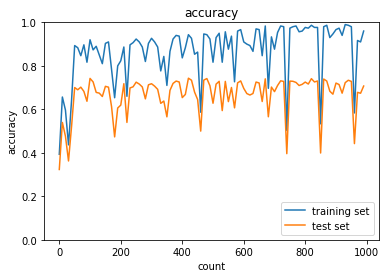

In [3]:
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)


iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate=0.1

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10
hidden_layer_num = network.hidden_layer_num

# 正則化強度設定 ======================================
weight_decay_lambda = 0.005
# =================================================

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    weight_decay = 0
    
    for idx in range(1, hidden_layer_num+1):
        grad['W' + str(idx)] = network.layers['Affine' + str(idx)].dW + weight_decay_lambda * np.sign(network.params['W' + str(idx)])
        grad['b' + str(idx)] = network.layers['Affine' + str(idx)].db
        network.params['W' + str(idx)] -= learning_rate * grad['W' + str(idx)]
        network.params['b' + str(idx)] -= learning_rate * grad['b' + str(idx)]        
        weight_decay += weight_decay_lambda * np.sum(np.abs(network.params['W' + str(idx)]))

    loss = network.loss(x_batch, d_batch) + weight_decay
    train_loss_list.append(loss)        
        
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))               
                
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

----------------------------------------------------------------------------------------------------------------------------------------
## [try] weigth_decay_lambdaの値を変更して正則化の強さを確認しよう
----------------------------------------------------------------------------------------------------------------------------------------

データ読み込み完了


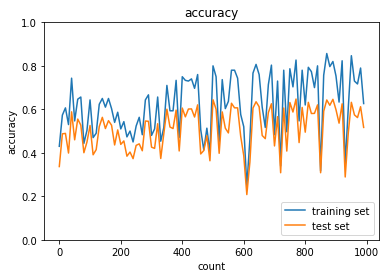

In [7]:
# 正則化強度設定 ======================================
#weight_decay_lambda = 0.005
weight_decay_lambda = 0.01
# =================================================

(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)


iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate=0.1

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10
hidden_layer_num = network.hidden_layer_num



for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    weight_decay = 0
    
    for idx in range(1, hidden_layer_num+1):
        grad['W' + str(idx)] = network.layers['Affine' + str(idx)].dW + weight_decay_lambda * np.sign(network.params['W' + str(idx)])
        grad['b' + str(idx)] = network.layers['Affine' + str(idx)].db
        network.params['W' + str(idx)] -= learning_rate * grad['W' + str(idx)]
        network.params['b' + str(idx)] -= learning_rate * grad['b' + str(idx)]        
        weight_decay += weight_decay_lambda * np.sum(np.abs(network.params['W' + str(idx)]))

    loss = network.loss(x_batch, d_batch) + weight_decay
    train_loss_list.append(loss)        
        
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)
        
        #print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        #print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))               
                
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

データ読み込み完了


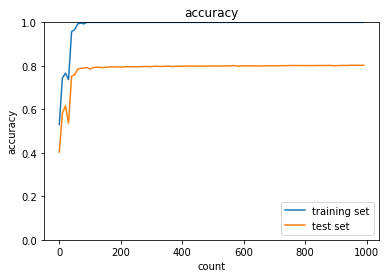

In [14]:
# 正則化強度設定 ======================================
#weight_decay_lambda = 0.005
weight_decay_lambda = 0.0001
# =================================================

(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)


iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate=0.1

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10
hidden_layer_num = network.hidden_layer_num



for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    weight_decay = 0
    
    for idx in range(1, hidden_layer_num+1):
        grad['W' + str(idx)] = network.layers['Affine' + str(idx)].dW + weight_decay_lambda * np.sign(network.params['W' + str(idx)])
        grad['b' + str(idx)] = network.layers['Affine' + str(idx)].db
        network.params['W' + str(idx)] -= learning_rate * grad['W' + str(idx)]
        network.params['b' + str(idx)] -= learning_rate * grad['b' + str(idx)]        
        weight_decay += weight_decay_lambda * np.sum(np.abs(network.params['W' + str(idx)]))

    loss = network.loss(x_batch, d_batch) + weight_decay
    train_loss_list.append(loss)        
        
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)
        
        #print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        #print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))               
                
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

## Dropout

In [4]:
class Dropout:
    def __init__(self, dropout_ratio=0.5):
        self.dropout_ratio = dropout_ratio
        self.mask = None

    def forward(self, x, train_flg=True):
        if train_flg:
            self.mask = np.random.rand(*x.shape) > self.dropout_ratio
            return x * self.mask
        else:
            return x * (1.0 - self.dropout_ratio)

    def backward(self, dout):
        return dout * self.mask

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.13666666666666666
                : 10. 正答率(テスト) = 0.1218
Generation: 20. 正答率(トレーニング) = 0.16
                : 20. 正答率(テスト) = 0.147
Generation: 30. 正答率(トレーニング) = 0.17333333333333334
                : 30. 正答率(テスト) = 0.1574
Generation: 40. 正答率(トレーニング) = 0.18666666666666668
                : 40. 正答率(テスト) = 0.1656
Generation: 50. 正答率(トレーニング) = 0.2
                : 50. 正答率(テスト) = 0.1755
Generation: 60. 正答率(トレーニング) = 0.23333333333333334
                : 60. 正答率(テスト) = 0.1937
Generation: 70. 正答率(トレーニング) = 0.25666666666666665
                : 70. 正答率(テスト) = 0.2049
Generation: 80. 正答率(トレーニング) = 0.25
                : 80. 正答率(テスト) = 0.2029
Generation: 90. 正答率(トレーニング) = 0.26
                : 90. 正答率(テスト) = 0.2039
Generation: 100. 正答率(トレーニング) = 0.25
                : 100. 正答率(テスト) = 0.1943
Generation: 110. 正答率(トレーニング) = 0.3
                : 110. 正答率(テスト) = 0.2298
Generation: 120. 正答率(トレーニング) = 0.31666666666666665
                : 120. 正答率(テスト) = 0.24

Generation: 960. 正答率(トレーニング) = 0.9266666666666666
                : 960. 正答率(テスト) = 0.7211
Generation: 970. 正答率(トレーニング) = 0.9266666666666666
                : 970. 正答率(テスト) = 0.7201
Generation: 980. 正答率(トレーニング) = 0.9366666666666666
                : 980. 正答率(テスト) = 0.7296
Generation: 990. 正答率(トレーニング) = 0.9333333333333333
                : 990. 正答率(テスト) = 0.7224
Generation: 1000. 正答率(トレーニング) = 0.9333333333333333
                : 1000. 正答率(テスト) = 0.7297


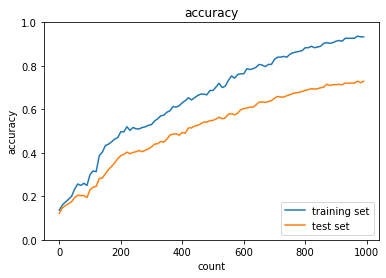

In [5]:
from common import optimizer
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

# ドロップアウト設定 ======================================
use_dropout = True
dropout_ratio = 0.15
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda, use_dropout = use_dropout, dropout_ratio = dropout_ratio)
optimizer = optimizer.SGD(learning_rate=0.01)
# optimizer = optimizer.Momentum(learning_rate=0.01, momentum=0.9)
# optimizer = optimizer.AdaGrad(learning_rate=0.01)
# optimizer = optimizer.Adam()

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10


for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    optimizer.update(network.params, grad)

    loss = network.loss(x_batch, d_batch)
    train_loss_list.append(loss)    
    
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)

        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))        
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

---------------------------------------------------------------------------------------------------------------------------------------------------------------------
## [try] dropout_ratioの値を変更してみよう

データ読み込み完了


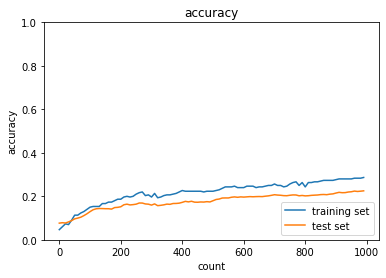

In [9]:
# ドロップアウト設定 ======================================
use_dropout = True
#dropout_ratio = 0.15
dropout_ratio = 0.30
# ====================================================

from common import optimizer
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]



network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda, use_dropout = use_dropout, dropout_ratio = dropout_ratio)
optimizer = optimizer.SGD(learning_rate=0.01)
# optimizer = optimizer.Momentum(learning_rate=0.01, momentum=0.9)
# optimizer = optimizer.AdaGrad(learning_rate=0.01)
# optimizer = optimizer.Adam()

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10


for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    optimizer.update(network.params, grad)

    loss = network.loss(x_batch, d_batch)
    train_loss_list.append(loss)    
    
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)

        #print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        #print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))        
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

データ読み込み完了


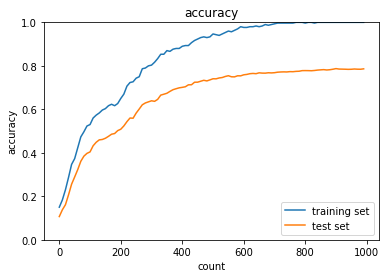

In [10]:
# ドロップアウト設定 ======================================
use_dropout = True
#dropout_ratio = 0.15
dropout_ratio = 0.07
# ====================================================

from common import optimizer
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]



network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda, use_dropout = use_dropout, dropout_ratio = dropout_ratio)
optimizer = optimizer.SGD(learning_rate=0.01)
# optimizer = optimizer.Momentum(learning_rate=0.01, momentum=0.9)
# optimizer = optimizer.AdaGrad(learning_rate=0.01)
# optimizer = optimizer.Adam()

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10


for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    optimizer.update(network.params, grad)

    loss = network.loss(x_batch, d_batch)
    train_loss_list.append(loss)    
    
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)

        #print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        #print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))        
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

## [try] optimizerとdropout_ratioの値を変更してみよう
---------------------------------------------------------------------------------------------------------------------------------------------------------------------

データ読み込み完了


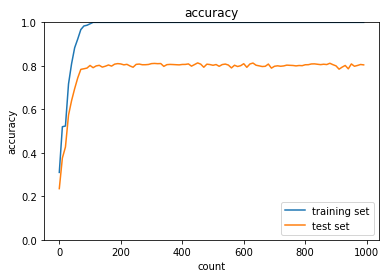

In [12]:
# ドロップアウト設定 ======================================
use_dropout = True
dropout_ratio = 0.15
# ====================================================
from common import optimizer
#optimizer = optimizer.SGD(learning_rate=0.01)
# optimizer = optimizer.Momentum(learning_rate=0.01, momentum=0.9)
# optimizer = optimizer.AdaGrad(learning_rate=0.01)
optimizer = optimizer.Adam()


(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]



network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda, use_dropout = use_dropout, dropout_ratio = dropout_ratio)


iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10


for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    optimizer.update(network.params, grad)

    loss = network.loss(x_batch, d_batch)
    train_loss_list.append(loss)    
    
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)

        #print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        #print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))        
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

データ読み込み完了


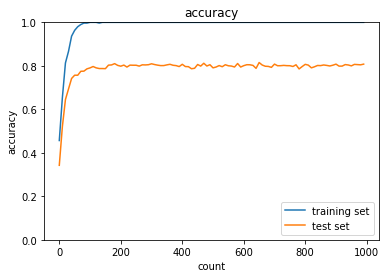

In [13]:
# ドロップアウト設定 ======================================
use_dropout = True
#dropout_ratio = 0.15
dropout_ratio = 0.07
# ====================================================
from common import optimizer
#optimizer = optimizer.SGD(learning_rate=0.01)
# optimizer = optimizer.Momentum(learning_rate=0.01, momentum=0.9)
# optimizer = optimizer.AdaGrad(learning_rate=0.01)
optimizer = optimizer.Adam()


(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]



network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda, use_dropout = use_dropout, dropout_ratio = dropout_ratio)


iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10


for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    optimizer.update(network.params, grad)

    loss = network.loss(x_batch, d_batch)
    train_loss_list.append(loss)    
    
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)

        #print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        #print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))        
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

## Dropout + L1

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.08666666666666667
                : 10. 正答率(テスト) = 0.093
Generation: 20. 正答率(トレーニング) = 0.10666666666666667
                : 20. 正答率(テスト) = 0.1016
Generation: 30. 正答率(トレーニング) = 0.12
                : 30. 正答率(テスト) = 0.1099
Generation: 40. 正答率(トレーニング) = 0.13
                : 40. 正答率(テスト) = 0.1224
Generation: 50. 正答率(トレーニング) = 0.15333333333333332
                : 50. 正答率(テスト) = 0.1376
Generation: 60. 正答率(トレーニング) = 0.21
                : 60. 正答率(テスト) = 0.1592
Generation: 70. 正答率(トレーニング) = 0.23666666666666666
                : 70. 正答率(テスト) = 0.1752
Generation: 80. 正答率(トレーニング) = 0.2733333333333333
                : 80. 正答率(テスト) = 0.1971
Generation: 90. 正答率(トレーニング) = 0.32
                : 90. 正答率(テスト) = 0.22
Generation: 100. 正答率(トレーニング) = 0.36666666666666664
                : 100. 正答率(テスト) = 0.2534
Generation: 110. 正答率(トレーニング) = 0.4266666666666667
                : 110. 正答率(テスト) = 0.2821
Generation: 120. 正答率(トレーニング) = 0.48333333333333334
          

Generation: 980. 正答率(トレーニング) = 0.95
                : 980. 正答率(テスト) = 0.7524
Generation: 990. 正答率(トレーニング) = 0.9466666666666667
                : 990. 正答率(テスト) = 0.7497
Generation: 1000. 正答率(トレーニング) = 0.95
                : 1000. 正答率(テスト) = 0.7474


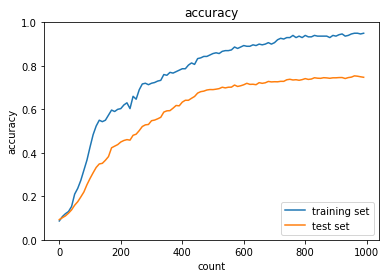

In [6]:
from common import optimizer
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

# ドロップアウト設定 ======================================
use_dropout = True
dropout_ratio = 0.08
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        use_dropout = use_dropout, dropout_ratio = dropout_ratio)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate=0.01

train_loss_list = []
accuracies_train = []
accuracies_test = []
hidden_layer_num = network.hidden_layer_num

plot_interval=10

# 正則化強度設定 ======================================
weight_decay_lambda=0.004
# =================================================

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    weight_decay = 0
    
    for idx in range(1, hidden_layer_num+1):
        grad['W' + str(idx)] = network.layers['Affine' + str(idx)].dW + weight_decay_lambda * np.sign(network.params['W' + str(idx)])
        grad['b' + str(idx)] = network.layers['Affine' + str(idx)].db
        network.params['W' + str(idx)] -= learning_rate * grad['W' + str(idx)]
        network.params['b' + str(idx)] -= learning_rate * grad['b' + str(idx)]        
        weight_decay += weight_decay_lambda * np.sum(np.abs(network.params['W' + str(idx)]))

    loss = network.loss(x_batch, d_batch) + weight_decay
    train_loss_list.append(loss)        
        
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))               
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

# 考察

過学習に対するアプローチを実装で確認することができた。

## weigth_decay_lambdaの値を変更して正則化の強さを確認

`weight_decay_lambda`を、0.005から、0.01/0.0001に変更し、トレーニング結果が改悪/善することが確認できた。

## dropout_ratioの値を変更

`dropout_ratio`を0.15から、0.30/0.07に変更し、トレーニング結果が改悪/善することが確認できた。

## optimizerとdropout_ratioの値を変更

optimizerをAdamに変更し、`dropout_ratio`を0.15/0.08で検証、optimizerがAdamのケースで最もよい結果が出たように思う（この時、`dropout_ratio`の変更による影響は見られなかった）。